In [1]:
import os
import glob
import numpy as np

In [28]:
# we want to store results for each sensor, and show four plots
# per sensor -- for {v1,v2} x {K,maxK}

source = 'govdata'
sensor = 'pm10'
mape_sensor_dict = dict()
rmse_sensor_dict = dict()
monitorids_list = np.loadtxt('results/{0}_{1}/errors_{0}_{1}_maxK01_v1.csv'.format(source, sensor), delimiter=',', skiprows=1, usecols=[0], dtype=str)
print(len(monitorids_list))
print(monitorids_list)

33
['AnandVihar_DPCC' 'AshokVihar_DPCC' 'AyaNagar_IMD' 'BurariCrossing_IMD'
 'CRRIMathuraRoad_IMD' 'DKSSR_DPCC' 'DTU_CPCB' 'DwarkaSector8_DPCC'
 'EastArjunNagar_CPCB' 'IGIAirport_IMD' 'IHBAS_CPCB' 'ITO_CPCB' 'JNS_DPCC'
 'Jahangirpuri_DPCC' 'LodhiRoad_IMD' 'MDCNS_DPCC' 'MandirMarg_DPCC'
 'Mundaka_DPCC' 'NSIT_CPCB' 'NehruNagar_DPCC' 'OkhlaPhase2_DPCC'
 'Patparganj_DPCC' 'PunjabiBagh_DPCC' 'Pusa_DPCC' 'Pusa_IMD'
 'RKPuram_DPCC' 'Rohini_DPCC' 'Shadipur_CPCB' 'Sirifort_CPCB'
 'SoniaVihar_DPCC' 'SriAurobindoMarg_DPCC' 'VivekVihar_DPCC'
 'Wazirpur_DPCC']


In [29]:
# max length of monitor IDs, for formatting
max(map(len, monitorids_list))

21

In [30]:
for fid in monitorids_list:
    mape_sensor_dict[fid] = np.empty((10,4)) * np.nan
    rmse_sensor_dict[fid] = np.empty((10,4)) * np.nan

In [31]:
from tqdm import tqdm
for K in tqdm(range(10)):
    for vii, version in enumerate(('v1', 'v2')):
        fin = open('results/{0}_{1}/errors_{0}_{1}_maxK{2:02d}_{3}.csv'.format(source, sensor, K+1, version))
        fin.readline()
        for line in fin:
            fields = line.split(',')
            mape_sensor_dict[fields[0]][K,2*vii:2*vii+2] = (float(fields[5]), float(fields[7]))
            rmse_sensor_dict[fields[0]][K,2*vii:2*vii+2] = (float(fields[4]), float(fields[6]))

100%|██████████| 10/10 [00:00<00:00, 1472.00it/s]


In [32]:
# mape_sensor_dict['113E']
mape_sensor_dict['AnandVihar_DPCC']

array([[49.4082, 49.4082, 23.6058, 23.6058],
       [46.9782, 46.9782, 17.9632, 17.9632],
       [48.7713, 48.7713, 19.7183, 19.7183],
       [52.3702, 52.3702, 21.1759, 21.1759],
       [49.2945, 49.2945, 26.9985, 26.9985],
       [56.0463, 56.0463, 22.5736, 22.5736],
       [45.5936, 45.5936, 20.417 , 20.417 ],
       [50.9348, 50.9348, 31.0116, 31.0116],
       [53.4902, 53.4902, 22.2416, 22.2416],
       [55.0692, 55.0692, 21.4728, 21.4728]])

In [33]:
# rmse_sensor_dict['113E']
rmse_sensor_dict['AnandVihar_DPCC']

array([[303.9675, 303.9675, 176.4   , 176.4   ],
       [292.6538, 292.6538, 132.6243, 132.6243],
       [296.1342, 296.1342, 136.7513, 136.7513],
       [309.7891, 309.7891, 161.7546, 161.7546],
       [306.3876, 306.3876, 199.7267, 199.7267],
       [319.4816, 319.4816, 174.8333, 174.8333],
       [287.2981, 287.2981, 153.0293, 153.0293],
       [303.5989, 303.5989, 208.5318, 208.5318],
       [310.8874, 310.8874, 171.3112, 171.3112],
       [317.1885, 317.1885, 169.7443, 169.7443]])

In [34]:
# the min and average errors
from operator import itemgetter
errorstats = []
for fid, result_tab in mape_sensor_dict.items():
    errorstats.append((fid, result_tab.min(), result_tab.max(), result_tab.mean(), result_tab.std(), result_tab.max() - result_tab.min()))

In [35]:
errorstats.sort(key=itemgetter(1))
for row in errorstats:
    # print('{}, {:9.4f}, {:9.4f}, {:9.4f}, {:9.4f}, {:9.4f}'.format(*row))
    print('{:<22}, {:9.4f}, {:9.4f}, {:9.4f}, {:9.4f}, {:9.4f}'.format(*row))

EastArjunNagar_CPCB   ,    0.0000,    0.0000,    0.0000,    0.0000,    0.0000
IHBAS_CPCB            ,    0.0000,    0.0000,    0.0000,    0.0000,    0.0000
NSIT_CPCB             ,    0.0000,    0.0000,    0.0000,    0.0000,    0.0000
Shadipur_CPCB         ,    0.0000,    0.0000,    0.0000,    0.0000,    0.0000
Sirifort_CPCB         ,   12.1105,   39.4144,   22.7547,    6.3977,   27.3039
OkhlaPhase2_DPCC      ,   14.3143,   31.8060,   22.6222,    5.7057,   17.4917
Patparganj_DPCC       ,   14.5068,   41.9407,   21.5558,    6.2126,   27.4339
NehruNagar_DPCC       ,   14.5235,   30.4395,   22.6407,    4.7297,   15.9160
AshokVihar_DPCC       ,   14.7753,   34.8301,   27.4423,    5.2974,   20.0548
JNS_DPCC              ,   15.7346,   37.6950,   29.4627,    7.4914,   21.9604
Wazirpur_DPCC         ,   15.8312,   36.9863,   26.4601,    6.1111,   21.1551
Jahangirpuri_DPCC     ,   15.9411,   47.5679,   26.8015,    8.1605,   31.6268
VivekVihar_DPCC       ,   16.3622,   42.8395,   27.3160,    9.08

In [36]:
# (1) stats of errors at each location
with open('results/mape_stats_{}_{}.csv'.format(source, sensor), 'w') as fout:
    # fout.write('Sensor,{:>10},{:>10},{:>10},{:>10},{:>10}\n'.format('Min', 'Max', 'Mean', 'Std', 'Range'))
    fout.write('{:>22},{:>10},{:>10},{:>10},{:>10},{:>10}\n'.format('Sensor', 'Min', 'Max', 'Mean', 'Std', 'Range'))
    for row in errorstats:
        # fout.write('{:>6}, {:9.4f}, {:9.4f}, {:9.4f}, {:9.4f}, {:9.4f}\n'.format(*row))
        fout.write('{:<22}, {:9.4f}, {:9.4f}, {:9.4f}, {:9.4f}, {:9.4f}\n'.format(*row))

In [37]:
# (2) now plot MAPE and RMSE for each sensor vs K. Four plots in a single figure - {K, maxK} x {v1, v2}
import matplotlib.pyplot as plt

plt.rc('font', size=20)
x = np.arange(1,11)
lines = [None] * 4

for fid, result_tab in tqdm(mape_sensor_dict.items()):
    fig = plt.figure(figsize=(12,9))
    ax = fig.add_subplot(111)
    ax.set_title('Monitor: {}, MAPE vs K'.format(fid))
    lines[0], = ax.plot(x, result_tab[:,0], 'b.-', lw=2, label='K-NN v1')
    lines[1], = ax.plot(x, result_tab[:,1], 'b.--', lw=2, label='max-K-NN v1')
    lines[2], = ax.plot(x, result_tab[:,2], 'r.-', lw=2, label='K-NN v2')
    lines[3], = ax.plot(x, result_tab[:,3], 'r.--', lw=2, label='max-K-NN v2')
    ax.grid()
    ax.set_xlabel('Number of nearest neighbors (K)')
    ax.set_ylabel('MAPE of prediction in test region')
    ax.legend(lines, [l.get_label() for l in lines], loc='best')
    fig.tight_layout()
    fig.savefig('plots/errors_knn/{0}_{1}/mape_{0}_{1}_{2}.png'.format(source, sensor, fid))
    fig.savefig('plots/errors_knn/{0}_{1}/mape_{0}_{1}_{2}.pdf'.format(source, sensor, fid))
    plt.close(fig)

for fid, result_tab in tqdm(rmse_sensor_dict.items()):
    fig = plt.figure(figsize=(12,9))
    ax = fig.add_subplot(111)
    ax.set_title('Monitor: {}, RMSE vs K'.format(fid))
    lines[0], = ax.plot(x, result_tab[:,0], 'c.-', lw=2, label='K-NN v1')
    lines[1], = ax.plot(x, result_tab[:,1], 'c.--', lw=2, label='max-K-NN v1')
    lines[2], = ax.plot(x, result_tab[:,2], 'm.-', lw=2, label='K-NN v2')
    lines[3], = ax.plot(x, result_tab[:,3], 'm.--', lw=2, label='max-K-NN v2')
    ax.grid()
    ax.set_xlabel('Number of nearest neighbors (K)')
    ax.set_ylabel('RMSE of prediction in test region (ug/m3)')
    ax.legend(lines, [l.get_label() for l in lines], loc='best')
    fig.tight_layout()
    fig.savefig('plots/errors_knn/{0}_{1}/rmse_{0}_{1}_{2}.png'.format(source, sensor, fid))
    fig.savefig('plots/errors_knn/{0}_{1}/rmse_{0}_{1}_{2}.pdf'.format(source, sensor, fid))
    plt.close(fig)

100%|██████████| 33/33 [00:04<00:00,  7.56it/s]


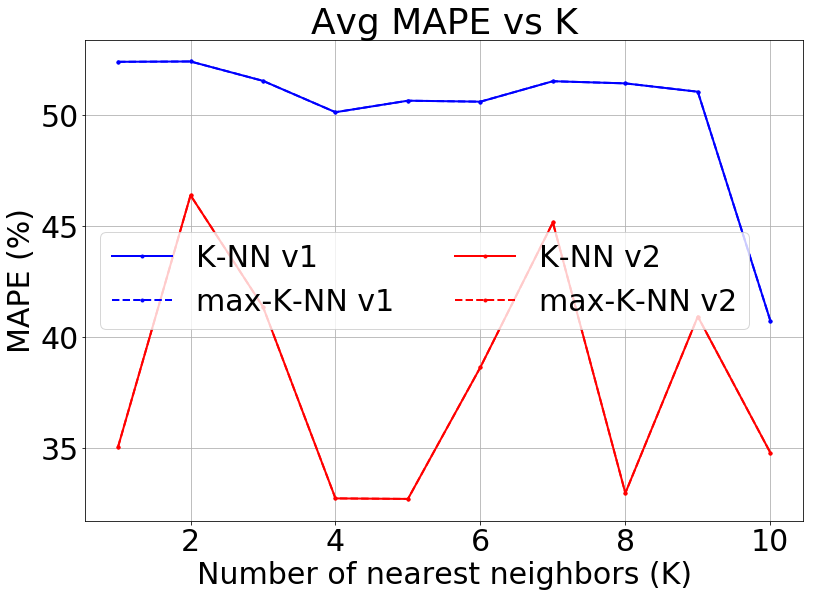

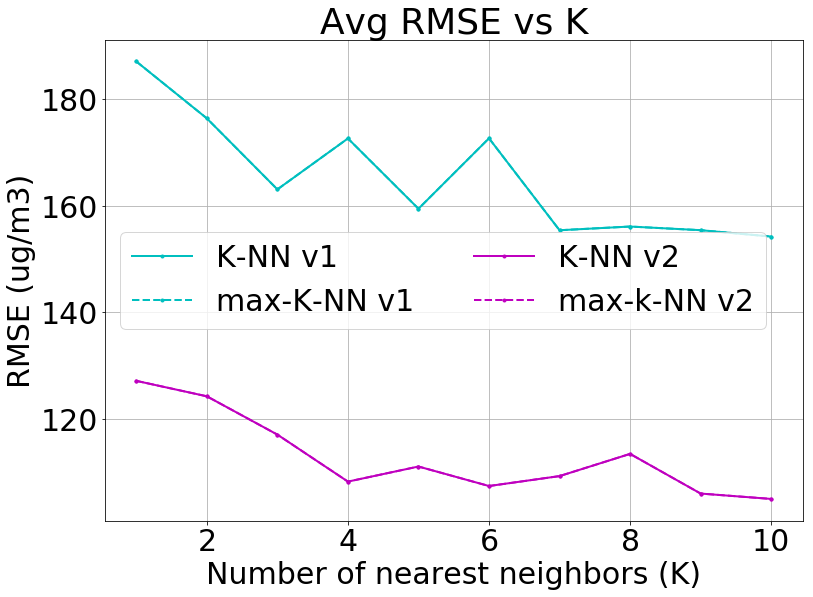

In [38]:
# (3) now plot avg MAPE and avg RMSE for across all sensors vs K. Four plots in a single figure - {K, maxK} x {v1, v2}
mape_avg_ndarray = np.dstack(tuple(mape_sensor_dict.values()))
rmse_avg_ndarray = np.dstack(tuple(rmse_sensor_dict.values()))
mape_avg = np.nanmean(mape_avg_ndarray, axis=2)
rmse_avg = np.nanmean(rmse_avg_ndarray, axis=2)

plt.rc('font', size=30)
x = np.arange(1,11)
lines = [None] * 4

fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111)
ax.set_title('Avg MAPE vs K'.format(fid))
lines[0], = ax.plot(x, mape_avg[:,0], 'b.-', lw=2, label='K-NN v1')
lines[1], = ax.plot(x, mape_avg[:,1], 'b.--', lw=2, label='max-K-NN v1')
lines[2], = ax.plot(x, mape_avg[:,2], 'r.-', lw=2, label='K-NN v2')
lines[3], = ax.plot(x, mape_avg[:,3], 'r.--', lw=2, label='max-K-NN v2')
ax.grid()
ax.set_xlabel('Number of nearest neighbors (K)')
ax.set_ylabel('MAPE (%)')
ax.legend(lines, [l.get_label() for l in lines], loc='best', ncol=2)
fig.tight_layout()
fig.savefig('plots/errors_knn/mape_{}_{}.png'.format(source, sensor))
fig.savefig('plots/errors_knn/mape_{}_{}.pdf'.format(source, sensor))

fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111)
ax.set_title('Avg RMSE vs K'.format(fid))
lines[0], = ax.plot(x, rmse_avg[:,0], 'c.-', lw=2, label='K-NN v1')
lines[1], = ax.plot(x, rmse_avg[:,1], 'c.--', lw=2, label='max-K-NN v1')
lines[2], = ax.plot(x, rmse_avg[:,2], 'm.-', lw=2, label='K-NN v2')
lines[3], = ax.plot(x, rmse_avg[:,3], 'm.--', lw=2, label='max-k-NN v2')
ax.grid()
ax.set_xlabel('Number of nearest neighbors (K)')
ax.set_ylabel('RMSE (ug/m3)')
ax.legend(lines, [l.get_label() for l in lines], loc='best', ncol=2)
fig.tight_layout()
fig.savefig('plots/errors_knn/rmse_{}_{}.png'.format(source, sensor))
fig.savefig('plots/errors_knn/rmse_{}_{}.pdf'.format(source, sensor))

plt.show()

In [39]:
plt.close('all')